# Analysis of Global Video Game Sales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Data Cleaning

The dataset has a small number of missing values in the 'Year' and 'Publisher' columns (less than 2% of the total data). For this analysis, the simplest and most effective strategy is to drop these rows to ensure data integrity.

In [6]:
df.dropna(inplace=True)

In [7]:
df['Year'] = df['Year'].astype(int)

In [8]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Q1：Which gaming platform is the best-selling platform in history?

In [9]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
platform_sales

Platform
PS2     1233.46
X360     969.60
PS3      949.35
Wii      909.81
DS       818.91
PS       727.39
GBA      305.62
PSP      291.71
PS4      278.10
PC       254.70
Name: Global_Sales, dtype: float64

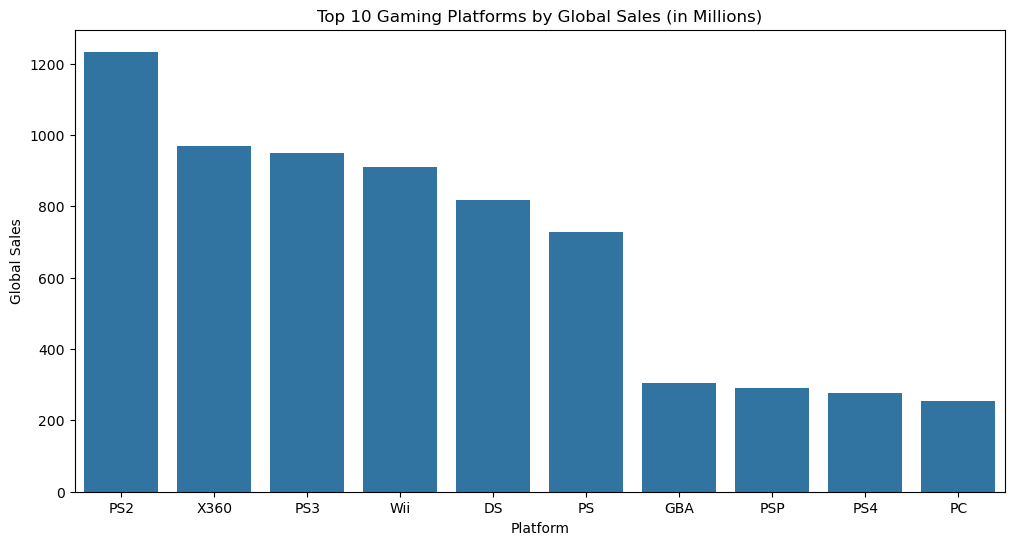

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Top 10 Gaming Platforms by Global Sales (in Millions)')
plt.ylabel('Global Sales')
plt.show()

## Conclusion: The analysis shows that the PlayStation 2 (PS2) is the best-selling platform of all time.

## Q2： What are the most popular gaming platforms in Europe and North America

In [5]:
na_platform_sales = df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False).head(10)
eu_platform_sales = df.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False).head(10)

print("--- Top 10 Platform in North America (in Millions) ---")
print(na_platform_sales)

print("--- Top 10 Platform in Europe (in Millions) ---")
print(eu_platform_sales)

--- Top 10 Platform in North America (in Millions) ---
Platform
X360    601.05
PS2     583.84
Wii     507.71
PS3     392.26
DS      390.71
PS      336.51
GBA     187.54
XB      186.69
N64     139.02
GC      133.46
Name: NA_Sales, dtype: float64
--- Top 10 Platform in Europe (in Millions) ---
Platform
PS3     343.71
PS2     339.29
X360    280.58
Wii     268.38
PS      213.60
DS      194.65
PC      139.68
PS4     123.70
GBA      75.25
PSP      68.25
Name: EU_Sales, dtype: float64
